In [85]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

In [86]:
mapa = {
    "expected_hours" : "estimativa_horas",
    "price" : "preco",
    "unfinished" : "nao_finalizado"
}

dados = dados.rename(columns = mapa)

In [87]:
troca = {
    1 : 0,
    0 : 1
}

dados["finalizado"] = dados.nao_finalizado.map(troca)

<Axes: xlabel='estimativa_horas', ylabel='preco'>

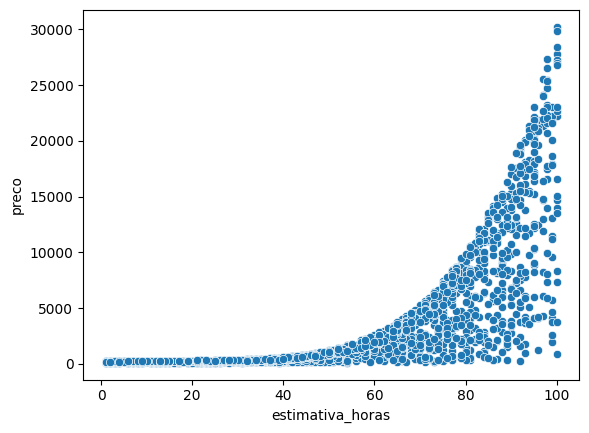

In [88]:
import seaborn as sns

sns.scatterplot(x="estimativa_horas", y="preco", data=dados) #Simples

<Axes: xlabel='estimativa_horas', ylabel='preco'>

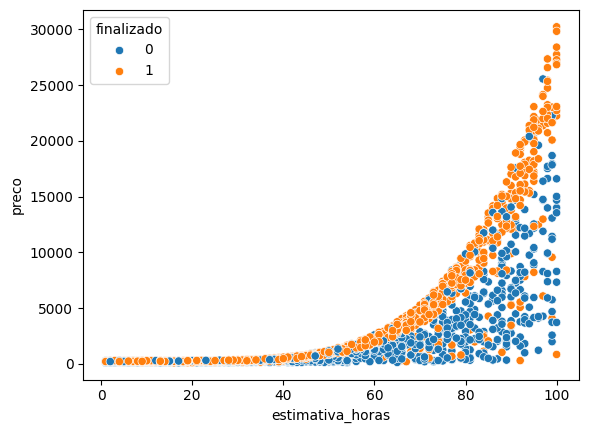

In [89]:
sns.scatterplot(x="estimativa_horas", y="preco", hue="finalizado", data=dados) #Diferencia os finalizados por cor

In [90]:
x = dados[["estimativa_horas", "preco"]]
y = dados["finalizado"]

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

seed = 10

treino_x, teste_x, treino_y, teste_y = train_test_split( # Mapeia as quatro variáveis de uma só vez
    x, 
    y, 
    random_state = seed, # Evita a aleatoriedade e que a eficácia se altere a cada teste
    test_size = 0.25, # Evita de testar 100% dos dados
    stratify = y # Evita que a proporção destoe demais
    ) 

model = LinearSVC()
model.fit(treino_x, treino_y)

previsoes = model.predict(teste_x)

taxa_acertos = accuracy_score(teste_y, previsoes) # Calcula a Acurácia
print("Taxa de Acerto: %.2f" % (taxa_acertos * 100))

Taxa de Acerto: 55.37


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [92]:
import numpy as np

previsoes_de_base = np.ones(540)

taxa_acertos = accuracy_score(teste_y, previsoes_de_base) # Calcula a Acurácia
print("Taxa de Acerto do algorítmo de baseline foi: %.2f" % (taxa_acertos * 100)) 

Taxa de Acerto do algorítmo de baseline foi: 52.59


<Axes: xlabel='estimativa_horas', ylabel='preco'>

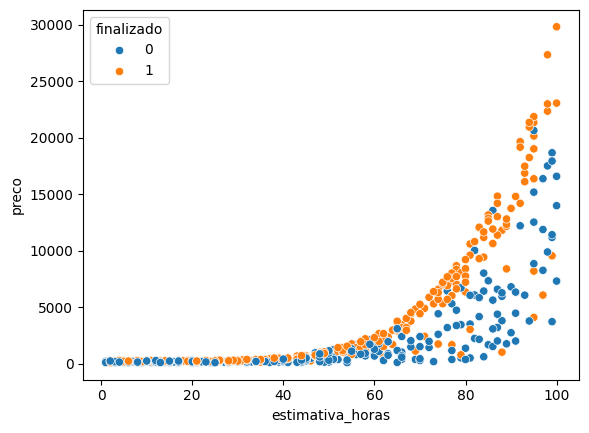

In [93]:
sns.scatterplot(x="estimativa_horas", y="preco", hue=teste_y, data=teste_x) #Diferencia os finalizados por cor

In [94]:
x_min = teste_x.estimativa_horas.min()
x_max = teste_x.estimativa_horas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 100 29820


In [95]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)


In [96]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [97]:
z = model.predict(pontos)
z = z.reshape(xx.shape)

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


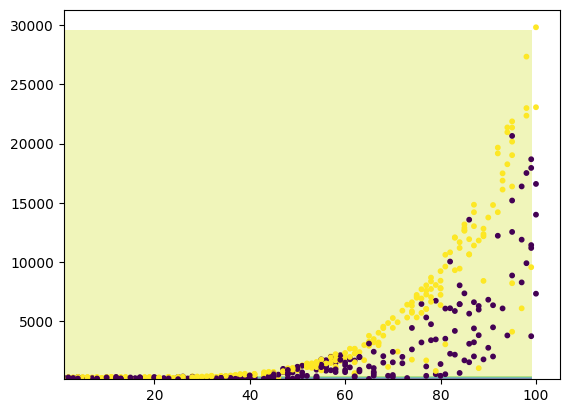

In [98]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.estimativa_horas, teste_x.preco, c=teste_y, s=10)

# A curva em roxo (bem pequena na parte inferior), mostra que esse algorítmo para 2 dimensões não é nada eficiente 